In [1]:
import tweepy
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

**Credentails are stored in twitter_auth.ipynb and read through cell below***

In [3]:
%run ./twitter_auth.ipynb

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [31]:
cursorx = tweepy.Cursor(api.user_timeline, id = 'Google', tweet_mode= 'extended').items(100)

In [28]:
for i in cursor:
    print(dir(i))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', 

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', 

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', 

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', 

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', 

In [32]:
for i in cursorx:
    print(i.full_text)

@khushal929 You're welcome! We suggest adding extra layers of security to your Google Account with these tips: https://t.co/HpAgO5vEEy.
@abdulllahanwar Hi Abdullah. We'd like to move this conversation to DM. Please follow us and let us know when you have so we can share next steps.
@kells42071015 Hmm. Let's see what we can do to help. Look out for a DM with next steps.
@rooh452 We do want to help. Please follow @Google and let us know when you have so we can share next steps.
@FlatSeller Hmm. Let's see what we can do to help. Look out for a DM with next steps.
@Lucky34640932 Hmm. Let's see what we can do to help. Look out for a DM with next steps.
@LbRaghuYT Hmm. Let's see what we can do to help. Please follow us and let us know when you have so we can share next steps through DM.
@AdesonFrank Hmm. Just to confirm, have you already tried recovering your account using the steps here: https://t.co/CJQaJUw3RV? These tips may help: https://t.co/vQSZijYFh6. Let us know.
@TausifA94523934 Hmm

@SinTaker06 Hmm. Did you try resetting your password by completing the steps on this page: https://t.co/CJQaJUestl? These tips may help: https://t.co/vQSZikgg8E. Let us know.
@VishalK67541075 We'd suggest adding extra layers of security to your account with these tips: https://t.co/HpAgO5vEEy. Hope this helps.
@feebeebridgers Hmm. Let's see what we can do to help. Please follow us and let us know when you have so we can share next steps through DM.
@_M_A_Y_A_N_K Hmm. Let's see what we can do to help. Please follow us and let us know when you have so we can share next steps through DM.
RT @WomenTechmakers: Black women are changing the world of tech. Hear their stories → https://t.co/vmaYrFuYCN
 
#WomenTechmakers is proud t…
@Slim17451471 Let's see what we can do to help. Please follow us and let us know when you have so we can share next steps through DM.
@Jaflle Hi there. Have you already tried recovering your account using the steps here: https://t.co/CJQaJUw3RV? These tips may help: 

In [5]:
cursor_hashx = tweepy.Cursor(api.user_timeline, q='machinelearning', tweet_mode= 'extended').items(100)

In [6]:
for c in cursor_hashx:
    print(c.full_text)

RT @Sauain: 10 Popular Sites to learn Machine Learning 🚀

👉 Coursera
👉 Kaggle
👉 edX
👉 Data Camp
👉 Google AI
👉 IBM Cognitive Classes
👉 Fast…
RT @RitupaGhosh: The Top 10 #MachineLearning #ML Algorithms Every Beginner Should Know.
 #python #deeplearning #ArtificialIntelligence #AI…
RT @KirkDBorne: #Python Libraries &amp; Frameworks!

#MachineLearning #DataScience #DataScientists https://t.co/m7GFAg6bAd
RT @alvinfoo: This device could predict incoming phone calls 😁 https://t.co/MDm5NpJaxq
@RanaMishka "Code compiled successfully"
RT @ml_india_: 🙋‍♀️ Most popular NLP Algorithms: 

1️⃣ Support Vector Machines

2️⃣ Bayesian Networks

3️⃣ Maximum Entropy

4️⃣ Conditional…
RT @ml_india_: If you are new to learning Python or you want to revise a few concepts, This is a MUST SAVE cheat sheet which covers all thi…
RT @Sauain: 10 Popular Machine Learning Libraries🚀👇

➡️ Tensorflow
➡️ Keras
➡️ Pandas
➡️ Numpy
➡️ OpenCV
➡️ Scipy
➡️ Pytorch
➡️ Matplotlib…
RT @driscollis: In less than 20 lines of #Pytho

@its_vsk @Mrwhosetheboss LoL...Serious cash 😂

It's NOT !
@NBCNews Wow...soo much negativity and preachers here in comment section. 

Wonder what did they achieve and their contribution to the society 🤦
#ExtraProtection4YourThroat

Damn  , how much this #cofsils pay ? It's trending everywhere with all IT cell accounts 😂
RT @svpino: Software developers that want to start with machine learning, start here:

• Decision Trees
• KNN

Everyone recommends Linear R…
RT @dannysteenman: If you just started following me and see this tweet, then you’re in luck!

You can request a free official AWS practice…
RT @omarsar0: 🎓 Introduction to Deep Learning (by MIT) 🎓

This is one of the top high-quality courses to learn the foundational knowledge o…
@Ivy_Ravenwood @LokiOfficial @disneyplus It almost reached end of the premise setup. I don't think there would be second season.
RT @Sauain: 𝗜𝗻𝘁𝗿𝗼 𝘁𝗼 𝗠𝗮𝗰𝗵𝗶𝗻𝗲 𝗟𝗲𝗮𝗿𝗻𝗶𝗻𝗴 💡

Let me introduce you to the absolute starting of Machine Learning

-What is ML?
-Its t

In [7]:
number_of_tweets = 200
tweets = []
likes = []
time = []

In [38]:
for i in tweepy.Cursor(api.user_timeline, id ='elonmusk', tweet_mode= 'extended').items(number_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

In [39]:
df = pd.DataFrame({"tweets": tweets ,"likes": likes, "time": time})

In [40]:
df.shape


(42, 3)

In [41]:
list_of_sentences =[sentence for sentence in df.tweets]

lines = []

for sentence in list_of_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)

In [42]:
lines = [re.sub('r[^a-zA-Z]+','',word) for word in lines]

C:\Users\sunee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


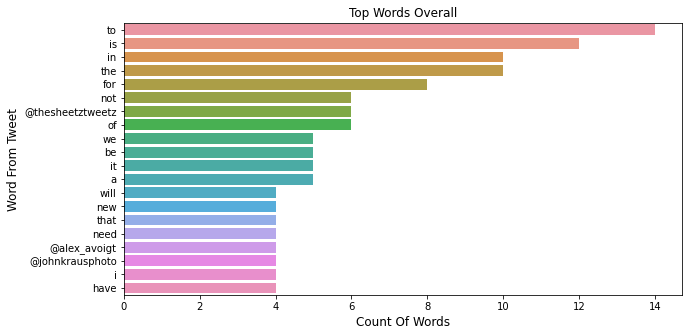

In [43]:
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')
stem =[]
stem = [s_stemmer.stem(l) for l in lines]

df2 = pd.DataFrame(stem)
df2 = df2[0].value_counts()
df2 = df2[:20,]

plt.figure(figsize=(10,5))
sns.barplot(df2.values, df2.index, alpha=1)
plt.title("Top Words Overall")
plt.ylabel("Word From Tweet", fontsize =12)
plt.xlabel("Count Of Words", fontsize=12)
plt.show();

C:\Users\sunee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


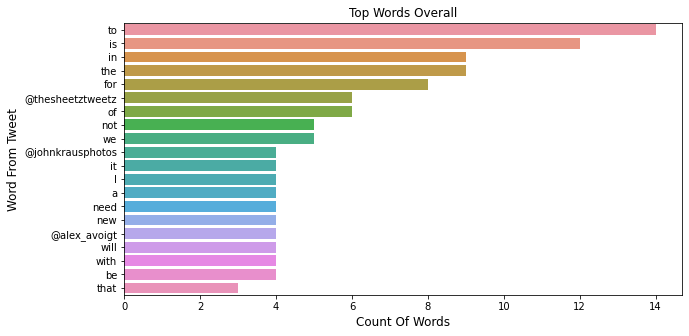

In [44]:
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
w_lemtzr = WordNetLemmatizer()

stemX =[]
stemX = [w_lemtzr.lemmatize(l) for l in lines]

df3 = pd.DataFrame(stemX)
df3 = df3[0].value_counts()
df3 = df3[:20,]

plt.figure(figsize=(10,5))
sns.barplot(df3.values, df3.index, alpha=1)
plt.title("Top Words Overall")
plt.ylabel("Word From Tweet", fontsize =12)
plt.xlabel("Count Of Words", fontsize=12)
plt.show()


In [17]:
#